In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV,KFold,RepeatedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


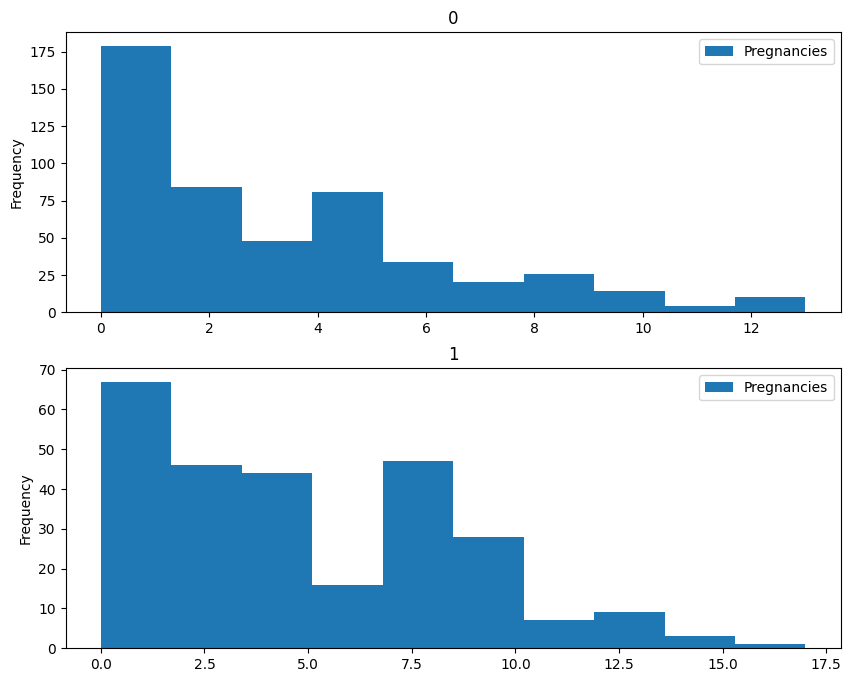

In [ ]:
ax = df.plot.hist(column=["Pregnancies"],by='Outcome', figsize=(10, 8))

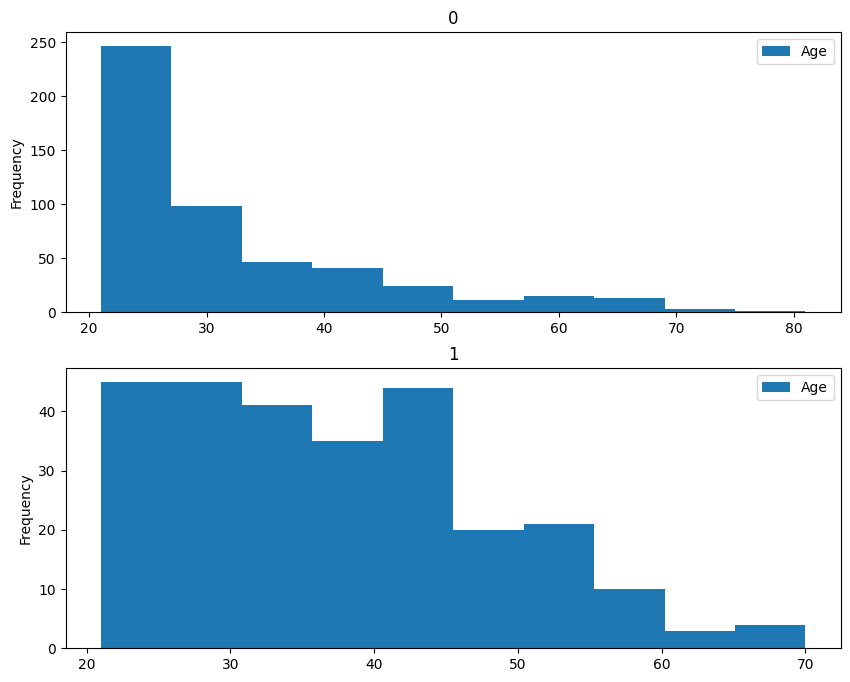

In [ ]:
ax = df.plot.hist(column=["Age"],by='Outcome', figsize=(10, 8))

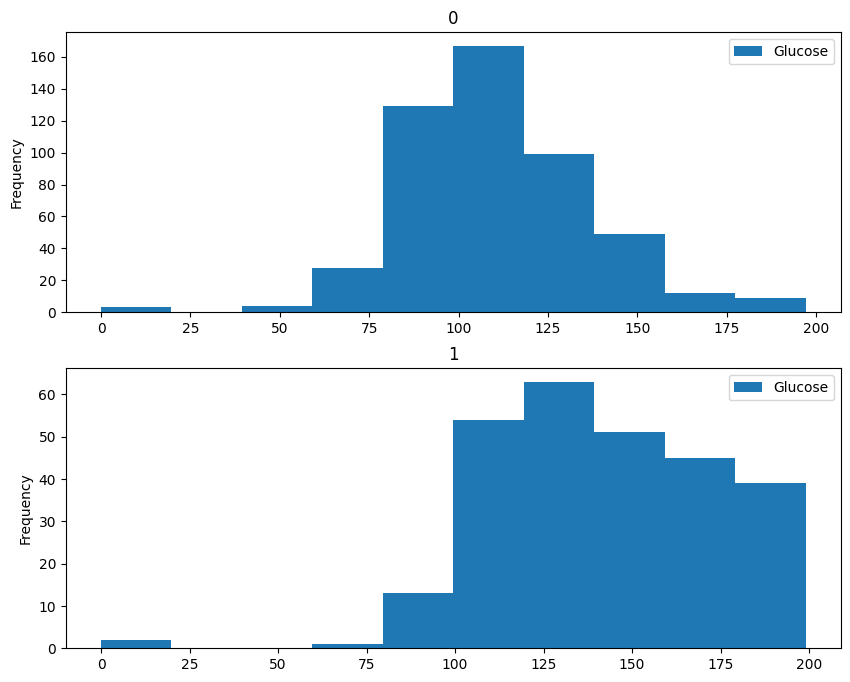

In [ ]:
ax = df.plot.hist(column=["Glucose"],by='Outcome', figsize=(10, 8))

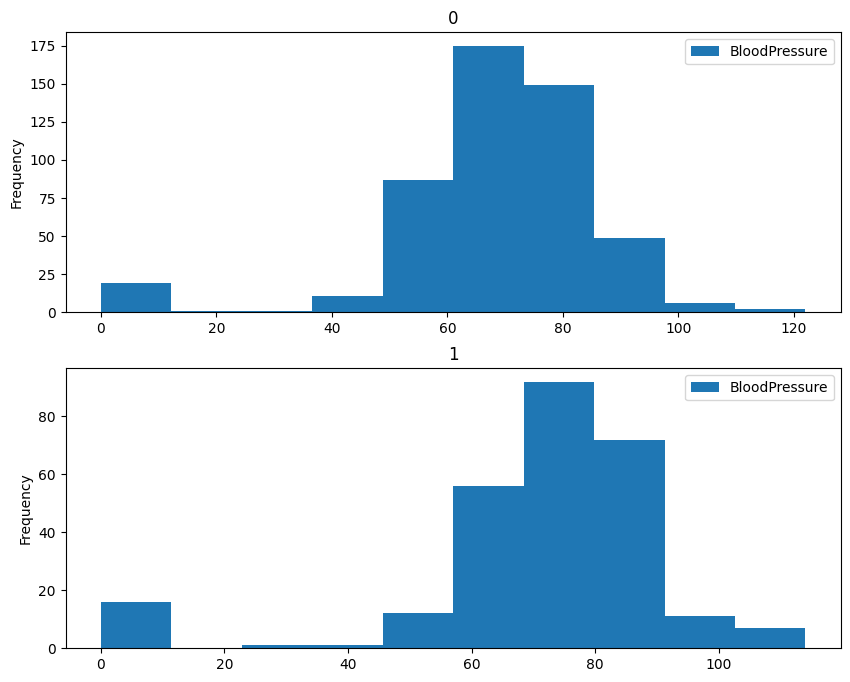

In [ ]:
ax = df.plot.hist(column=["BloodPressure"],by='Outcome', figsize=(10, 8))

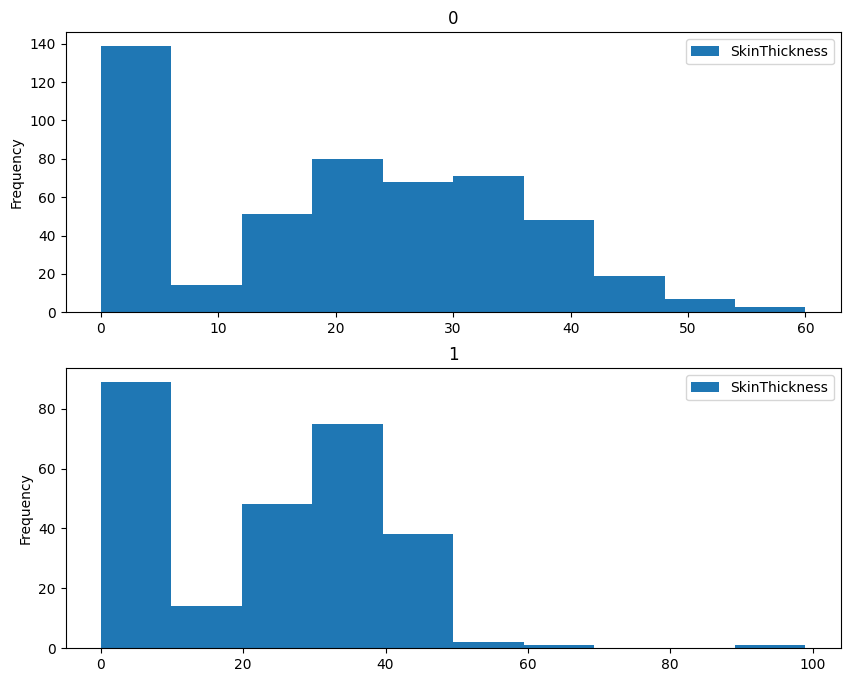

In [ ]:
ax = df.plot.hist(column=["SkinThickness"],by='Outcome', figsize=(10, 8))

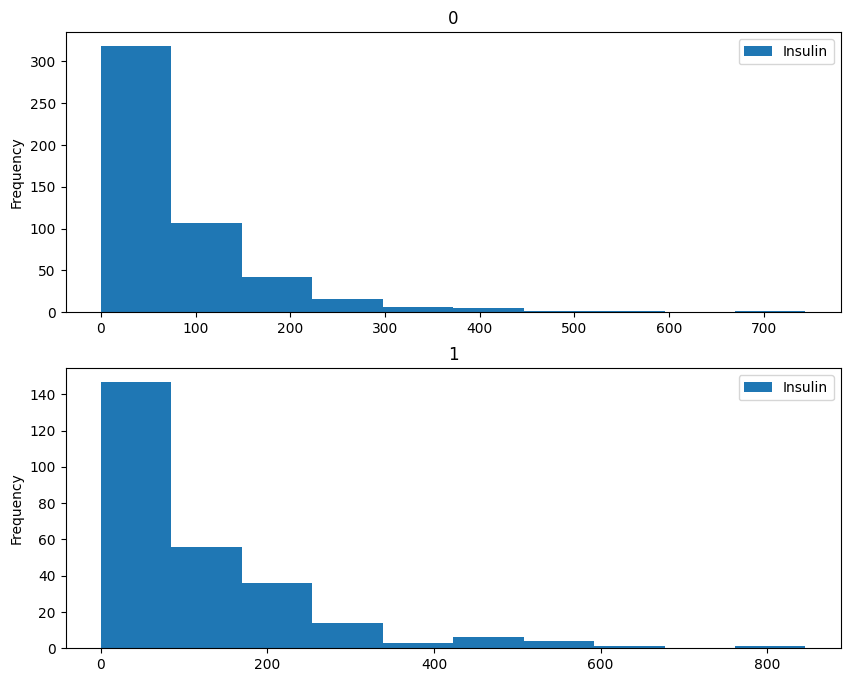

In [ ]:
ax = df.plot.hist(column=["Insulin"],by='Outcome', figsize=(10, 8))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

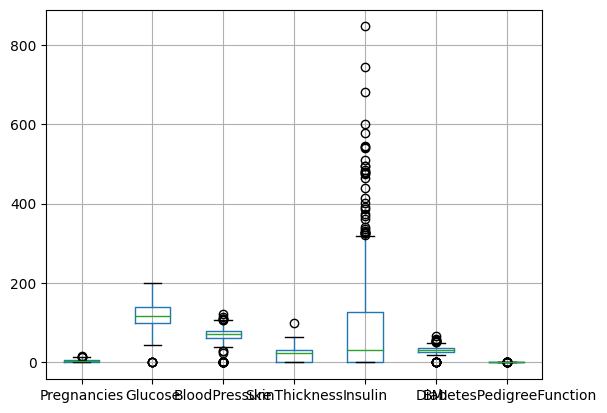

In [ ]:
#Preprocessing
#Remove duplicate data
df = df.drop_duplicates()
#Handle empty data
print(df.isnull().sum())
#Outlier detection
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'])


In [ ]:
for x in ['Pregnancies']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['Glucose']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['BloodPressure']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['SkinThickness']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['Insulin']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['BMI']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['DiabetesPedigreeFunction']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

print(df.isnull().sum())


Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          0
Outcome                      0
dtype: int64


In [ ]:
#Mean imputation

df['Pregnancies'].fillna((df['Pregnancies'].mean()), inplace=True)
df['Glucose'].fillna((df['Glucose'].mean()), inplace=True)
df['BloodPressure'].fillna((df['BloodPressure'].mean()), inplace=True)
df['SkinThickness'].fillna((df['SkinThickness'].mean()), inplace=True)
df['Insulin'].fillna((df['Insulin'].mean()), inplace=True)
df['BMI'].fillna((df['BMI'].mean()), inplace=True)
df['DiabetesPedigreeFunction'].fillna((df['DiabetesPedigreeFunction'].mean()), inplace=True)

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


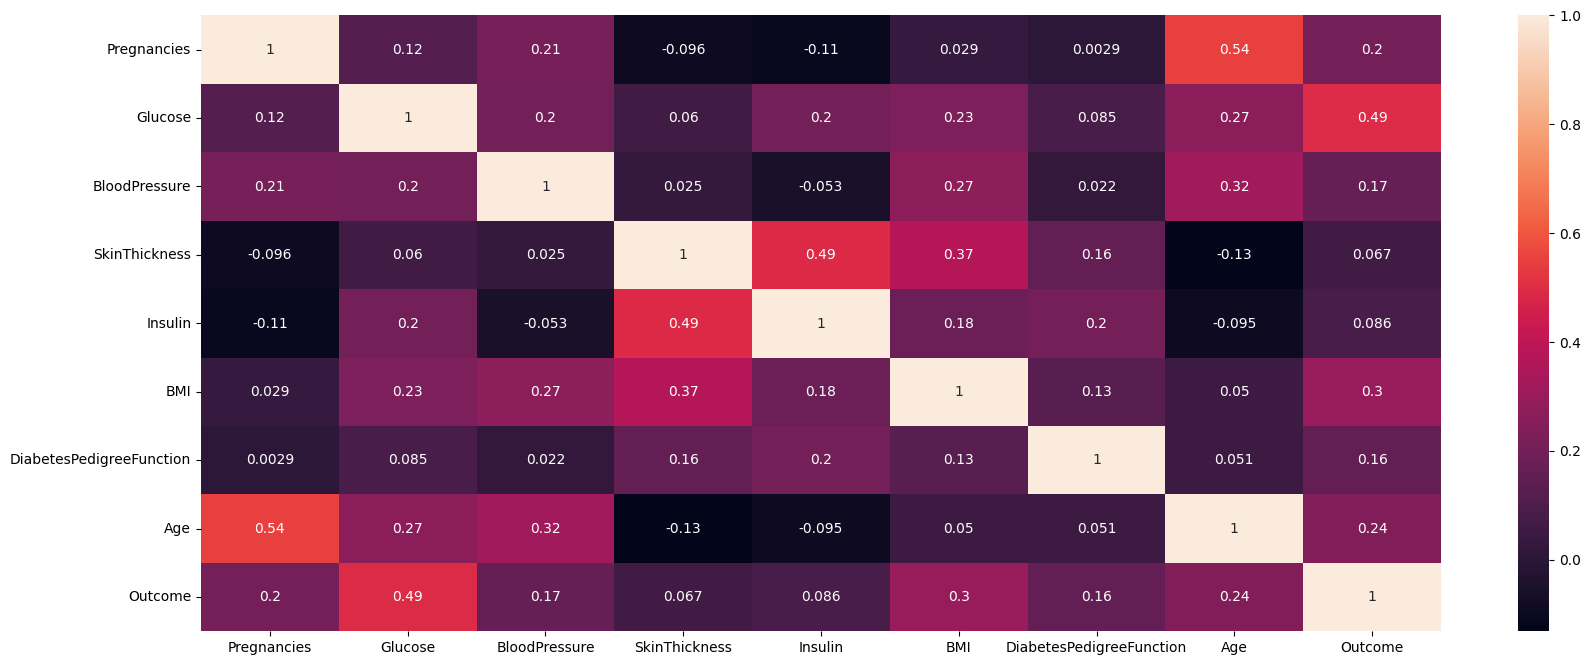

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 8))
corr_map = sns.heatmap(df.corr(), annot=True)

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
#Data Scaling by using standardization
#scaler = StandardScaler()
#X[["BMI","DiabetesPedigreeFunction"]] = scaler.fit_transform(X[["BMI","DiabetesPedigreeFunction"]])


In [ ]:
calc_vif(X)

,variables,VIF
0,Pregnancies,3.349188
1,SkinThickness,4.080883
2,Insulin,2.326074
3,BMI,17.574323
4,DiabetesPedigreeFunction,4.244086
5,Age,11.929102
6,GperBP,11.662696


In [ ]:
X = X.drop(['BMI'],axis=1)
calc_vif(X)

,variables,VIF
0,Pregnancies,3.348403
1,SkinThickness,3.311058
2,Insulin,2.301574
3,DiabetesPedigreeFunction,4.048652
4,Age,10.162347
5,GperBP,8.305898


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.208852,20.434159,62.328338,32.204005,0.429832,33.240885,0.348958
std,3.369578,30.435949,11.146615,15.698281,77.358761,6.410480,0.244918,11.760232,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.208852,23.000000,30.500000,32.204005,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,110.000000,36.300000,0.582250,41.000000,1.000000
max,17.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,81.000000,1.000000


In [ ]:
X.describe()

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,GperBP
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.786649,20.434159,62.328338,0.429832,33.240885,1.714558
std,3.270153,15.698281,77.358761,0.244918,11.760232,0.471479
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.641509
25%,1.000000,0.000000,0.000000,0.243750,24.000000,1.388095
50%,3.000000,23.000000,30.500000,0.372500,29.000000,1.645898
75%,6.000000,32.000000,110.000000,0.582250,41.000000,1.952453
max,13.000000,63.000000,318.000000,1.191000,81.000000,3.860000


In [ ]:
#Cross validation
cv = KFold(n_splits=5,shuffle=True,random_state=1)
#Hyperparameter tuning
grid = dict()
grid['C'] = np.arange(0.01,10,0.1)
grid['penalty'] = ['l1','l2','elasticnet']
grid['solver']=['liblinear','saga','lbfgs']
search = GridSearchCV(LogisticRegression(),grid,cv=cv)
results = search.fit(X,Y)
print("Best parameters = ",results.best_params_,"\n")
model = LogisticRegression(**results.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters =  {'C': 0.7100000000000001, 'penalty': 'l2', 'solver': 'liblinear'} 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2000 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.so

Accuracy from each folds:  [0.70779221 0.74025974 0.66883117 0.7124183  0.73202614]
Precision from each folds: [0.67857143 0.70588235 0.53333333 0.58823529 0.77777778]
Specificity from each folds: [0.90909091 0.9        0.86138614 0.86407767 0.93814433]
f1-score from each folds: [0.45783133 0.54545455 0.38554217 0.47619048 0.5060241 ]
Recall from each folds: [0.34545455 0.44444444 0.30188679 0.4        0.375     ] 

Mean Accuracy: 71.23 %
Mean Precision: 0.66
Mean Specificity: 0.89
Mean f1-score: 0.47
Mean recall: 0.37
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       500
           1       0.65      0.37      0.48       268

    accuracy                           0.71       768
   macro avg       0.69      0.63      0.64       768
weighted avg       0.70      0.71      0.69       768
 

Overall Confusion Matrix:



Text(0.5, 23.52222222222222, 'PREDICTED')

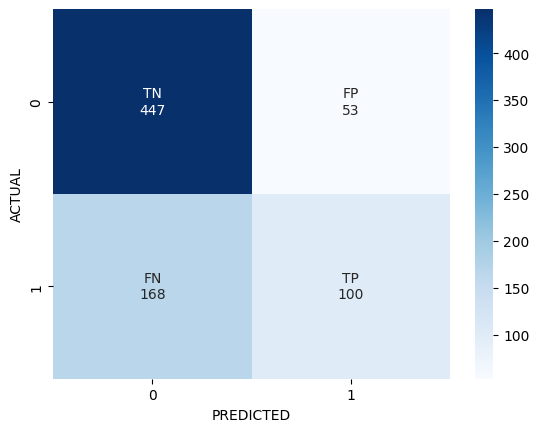

In [ ]:
#Evaluation
y_pred = cross_val_predict(model,X,Y,cv=cv)
cf = metrics.confusion_matrix(Y,y_pred)
acc_total = cross_val_score(model,X,Y,cv=cv)
pre_total = cross_val_score(model,X,Y,cv=cv,scoring='precision')
specificity = metrics.make_scorer(metrics.recall_score, pos_label=0)
spec_total = cross_val_score(model,X,Y,cv=cv,scoring=specificity)
f1_total = cross_val_score(model,X,Y,cv=cv,scoring='f1')
rec_total = cross_val_score(model,X,Y,cv=cv,scoring='recall')
print("Accuracy from each folds: ",acc_total)
print("Precision from each folds:",pre_total)
print("Specificity from each folds:",spec_total)
print("f1-score from each folds:",f1_total)
print("Recall from each folds:",rec_total,"\n")
mean_acc =acc_total.mean()*100
mean_pre =pre_total.mean()
mean_spec = spec_total.mean()
mean_f1 =f1_total.mean()
mean_rec =rec_total.mean()

print("Mean Accuracy: %.2f" % mean_acc,"%")
print("Mean Precision: %.2f" % mean_pre)
print("Mean Specificity: %.2f" % mean_spec)
print("Mean f1-score: %.2f" % mean_f1)
print("Mean recall: %.2f" % mean_rec)
print("Overall Classification Report:\n",metrics.classification_report(Y,y_pred),"\n")
print("Overall Confusion Matrix:\n")
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
labels = ['TN','FP','FN','TP']
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')